In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import one_hot

In [47]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Dataset = pd.read_csv('train_news.csv')

In [48]:
Dataset.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [49]:
#Removing duplicates
Dataset.drop_duplicates(inplace = True)

In [50]:
#check for null values
Dataset.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

In [51]:
Dataset.shape

(20800, 6)

In [52]:
#drop null values
d1 = Dataset.dropna()
d1.shape

(18285, 6)

In [53]:
d2 = d1.copy()

In [54]:
d2.reset_index(inplace=True)

In [55]:
d2['headline'][6]

'Alabama Prison Officials Retaliate Against Prison Strike Leader By Cutting Water To Cell'

In [56]:
## Get the Dependent features
y=d2['label']

In [57]:
y.shape

(18285,)

In [58]:
#Text Cleaning
import re
import string

from nltk.corpus import stopwords

# Using Lemmatizer.
from nltk.stem import WordNetLemmatizer
WL = WordNetLemmatizer()

corpus = []

for i in range(0, len(d2)):
    
    #Remove Unicode characters
    #TITLE = re.sub(r'[^\x00-\x7F]+', '', TITLE)
    TITLE = re.sub('[^a-zA-Z]', ' ', d2['headline'][i])

    #Convert to lowercase to maintain consistency
    TITLE = TITLE.lower()
    TITLE = TITLE.split()
    TITLE = [WL.lemmatize(word) for word in TITLE if not word in stopwords.words('english')]

    TITLE = ' '.join(TITLE)
    corpus.append(TITLE)

In [14]:
corpus

['ethic question dogged agriculture nominee georgia governor new york time',
 'u must dig deep stop argentina lionel messi new york time',
 'cotton house walk plank vote bill cannot pas senate breitbart',
 'paul lepage besieged maine governor sends conflicting signal intention new york time',
 'digital trump win',
 'rapid evolution saved fish pollution study say new york time',
 'alabama prison official retaliate prison strike leader cutting water cell',
 'live constant state love',
 'hillary closet drunk new wikileak email reveals aid asking sober day',
 'bloomberg backed pennsylvania attorney general sentenced month prison',
 'video le pen pelted egg keep smiling',
 'donald trump candidate american special interest',
 'wharton business school backer seek distance donald trump new york time',
 'brexit ruling latest tactic block people',
 'million south korean rise shadow government',
 'chelsea manning asks obama cut sentence time served new york time',
 'city vow fight trump immigrati

## OneHot Representation

In [15]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [16]:
### Vocabulary size
voc_size=5000

In [17]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[192, 1442, 3170, 2042, 3184, 942, 1218, 32, 3247, 3667],
 [125, 88, 1726, 1425, 888, 364, 2625, 4976, 32, 3247, 3667],
 [1547, 1732, 4232, 1023, 305, 1592, 967, 4445, 751, 2254],
 [934, 4027, 2384, 787, 1218, 2567, 3033, 2755, 655, 32, 3247, 3667],
 [2037, 2445, 1237],
 [3463, 3485, 1045, 682, 967, 2834, 930, 32, 3247, 3667],
 [2797, 855, 4151, 837, 855, 2504, 1818, 3088, 430, 3956],
 [415, 1025, 4815, 4111],
 [1047, 2036, 1870, 32, 3635, 4931, 292, 4422, 3634, 2903, 858],
 [3146, 2051, 1335, 1488, 4211, 1401, 2376, 855],
 [2228, 3090, 4056, 1603, 418, 2159, 2460],
 [662, 2445, 3852, 3594, 3287, 2624],
 [3652, 4733, 1707, 2178, 2351, 3894, 662, 2445, 32, 3247, 3667],
 [3910, 1088, 1272, 1298, 4844, 1660],
 [132, 3221, 1897, 2741, 286, 4701],
 [3964, 2311, 4244, 4546, 2378, 4717, 3667, 4315, 32, 3247, 3667],
 [1680, 201, 291, 2445, 3121, 1537, 504, 132, 32, 3247, 3667],
 [1912, 407, 2435, 2378, 2926, 4264, 2613, 811, 2254],
 [4495, 2532, 32, 3468, 3823, 32, 3247, 3667],
 [4742, 4056, 

## Embedding Representation

In [18]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...   32 3247 3667]
 [   0    0    0 ...   32 3247 3667]
 [   0    0    0 ... 4445  751 2254]
 ...
 [   0    0    0 ... 3944 2657 2900]
 [   0    0    0 ...   32 3247 3667]
 [   0    0    0 ... 1957 4422 2254]]


In [19]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  192,
       1442, 3170, 2042, 3184,  942, 1218,   32, 3247, 3667])

In [66]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.2))
model.add(LSTM(128, input_shape=(embedded_docs.shape), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
dropout_18 (Dropout)         (None, 20, 40)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 128)               86528     
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 286,657
Trainable params: 286,657
Non-trainable params: 0
_________________________________________________________________
None


In [60]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [61]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [69]:
### Finally Training
history=model.fit(X_train,y_train,validation_data= (X_test,y_test), epochs=5, batch_size=128)

Epoch 1/5
96/96 [==============================] - 7s 75ms/step - loss: 0.0055 - accuracy: 0.9980 - val_loss: 0.4434 - val_accuracy: 0.9218
Epoch 2/5
96/96 [==============================] - 7s 69ms/step - loss: 0.0042 - accuracy: 0.9989 - val_loss: 0.8381 - val_accuracy: 0.9190
Epoch 3/5
96/96 [==============================] - 7s 73ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.7702 - val_accuracy: 0.9165
Epoch 4/5
96/96 [==============================] - 7s 73ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.8403 - val_accuracy: 0.9225
Epoch 5/5
96/96 [==============================] - 7s 69ms/step - loss: 0.0031 - accuracy: 0.9989 - val_loss: 0.6923 - val_accuracy: 0.9175


In [41]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

In [42]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.03%


In [43]:
from sklearn.metrics import classification_report
target_names = ['Real', 'Fake']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Real       0.94      0.92      0.93      3413
        Fake       0.90      0.92      0.91      2622

    accuracy                           0.92      6035
   macro avg       0.92      0.92      0.92      6035
weighted avg       0.92      0.92      0.92      6035



In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm_Df = pd.DataFrame(cm, index=['real', 'fake'], columns= ['real', 'fake'], )
cm_Df.head()

,real,fake
real,3150,263
fake,218,2404


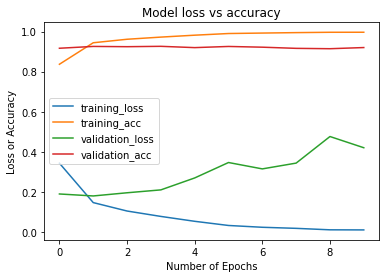

In [45]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_loss'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('Model loss vs accuracy')
pyplot.xlabel('Number of Epochs')
pyplot.ylabel('Loss or Accuracy')
pyplot.legend(['training_loss', 'training_acc', 'validation_loss', 'validation_acc'], loc='best')
pyplot.show()